In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [3]:
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/input\Economics.pdf
kaggle/input\ReadMe.pdf
kaggle/input\AICU\CropParameters.csv
kaggle/input\AICU\GreenhouseClimate.csv
kaggle/input\AICU\GrodanSens.csv
kaggle/input\AICU\LabAnalysis.csv
kaggle/input\AICU\Production.csv
kaggle/input\AICU\Resources.csv
kaggle/input\AICU\TomQuality.csv
kaggle/input\Automatoes\CropParameters.csv
kaggle/input\Automatoes\GreenhouseClimate.csv
kaggle/input\Automatoes\GrodanSens.csv
kaggle/input\Automatoes\LabAnalysis.csv
kaggle/input\Automatoes\Production.csv
kaggle/input\Automatoes\Resources.csv
kaggle/input\Automatoes\TomQuality.csv
kaggle/input\Digilog\CropParameters.csv
kaggle/input\Digilog\GreenhouseClimate.csv
kaggle/input\Digilog\GrodanSens.csv
kaggle/input\Digilog\LabAnalysis.csv
kaggle/input\Digilog\Production.csv
kaggle/input\Digilog\Resources.csv
kaggle/input\Digilog\TomQuality.csv
kaggle/input\IUACAAS\CropParameters.csv
kaggle/input\IUACAAS\GreenhouseClimate.csv
kaggle/input\IUACAAS\GrodanSens.csv
kaggle/input\IUACAAS\LabAnalysis.csv
kagg

# Análisis exploratorio de datos

In [10]:
# Función para gráficos de distribución de columnas
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]  # Entre 1 y 50 valores únicos
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    
    # 
    plt.figure(figsize=(16 * nGraphPerRow, 12 * nGraphRow), dpi=80)
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [11]:
# Función para la matriz de correlación
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis=1)  # Eliminar columnas con NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # Columnas con más de 1 valor único
    if df.shape[1] < 2:
        print('No se muestran gráficos de correlación: menos de 2 columnas con valores únicos')
        return
    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80)
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(corrMat)
    plt.title(f'Matriz de Correlación', fontsize=15)
    plt.show()

In [12]:
# Función para gráficos de dispersión y densidad
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Solo columnas numéricas
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate(f'Coef. de Corr. = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Gráfico de Dispersión y Densidad')
    plt.show()

In [13]:
# Cargar y visualizar los datos
nRowsRead = 1000

# GreenhouseClimate.csv

In [14]:

df1 = pd.read_csv('kaggle/input/AICU/GreenhouseClimate.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'GreenhouseClimate.csv'
print(f'There are {df1.shape[0]} rows and {df1.shape[1]} columns in {df1.dataframeName}')
print(df1.head())

There are 1000 rows and 50 columns in GreenhouseClimate.csv
         %time  AssimLight  BlackScr  CO2air  Cum_irr  EC_drain_PC  EnScr  \
0  43815.00000         100        35     509     31.6          0.3     96   
1  43815.00347         100        85     484     31.8          0.3     96   
2  43815.00694         100        96     475     31.8          0.3     96   
3  43815.01042         100        96     501     32.0          0.3     96   
4  43815.01389         100        96     487     32.0          0.3     96   

   HumDef  PipeGrow  PipeLow  ...  t_rail_min_sp  t_rail_min_vip  t_vent_sp  \
0     8.8       0.0     49.9  ...            NaN             0.0        NaN   
1     9.2       0.0     48.5  ...            NaN             0.0        NaN   
2     9.1       0.0     46.8  ...            NaN             0.0        NaN   
3     8.5       0.0     45.2  ...            NaN             0.0        NaN   
4     8.5       0.0     43.8  ...            NaN             0.0        NaN   

  

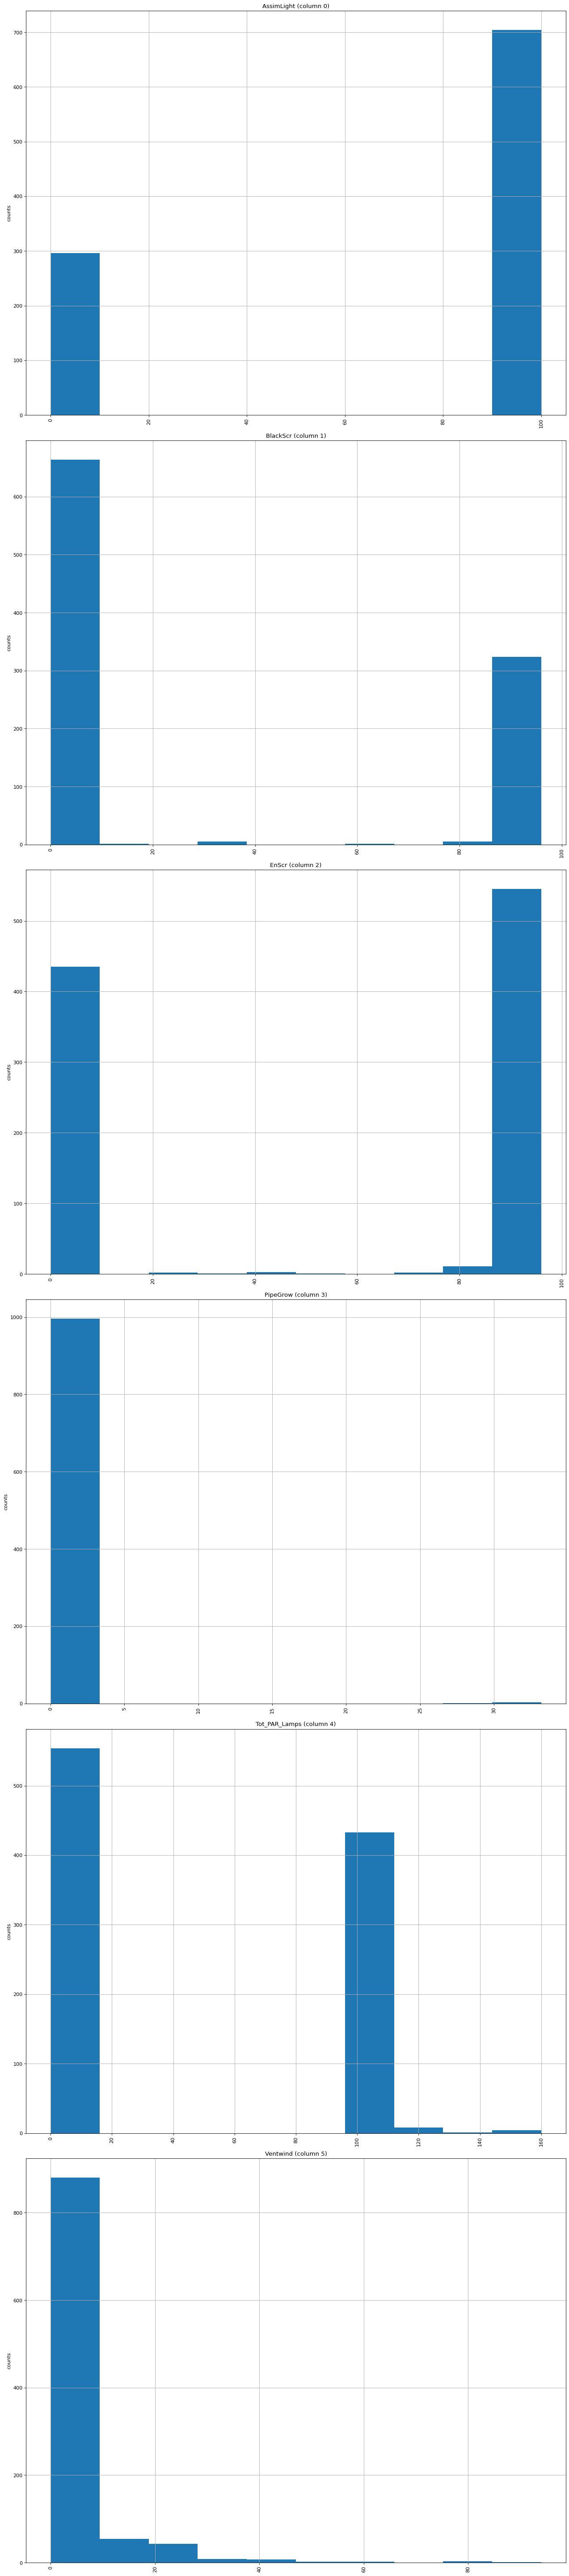

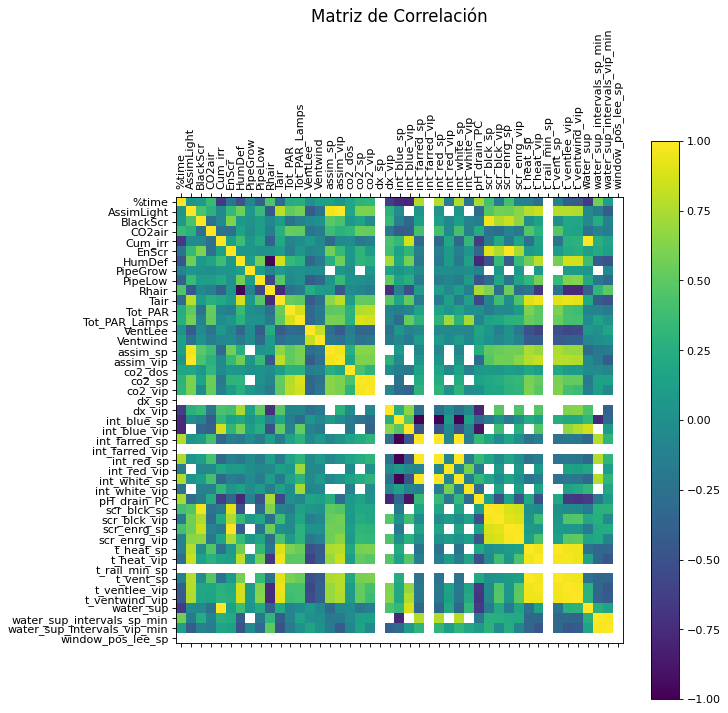

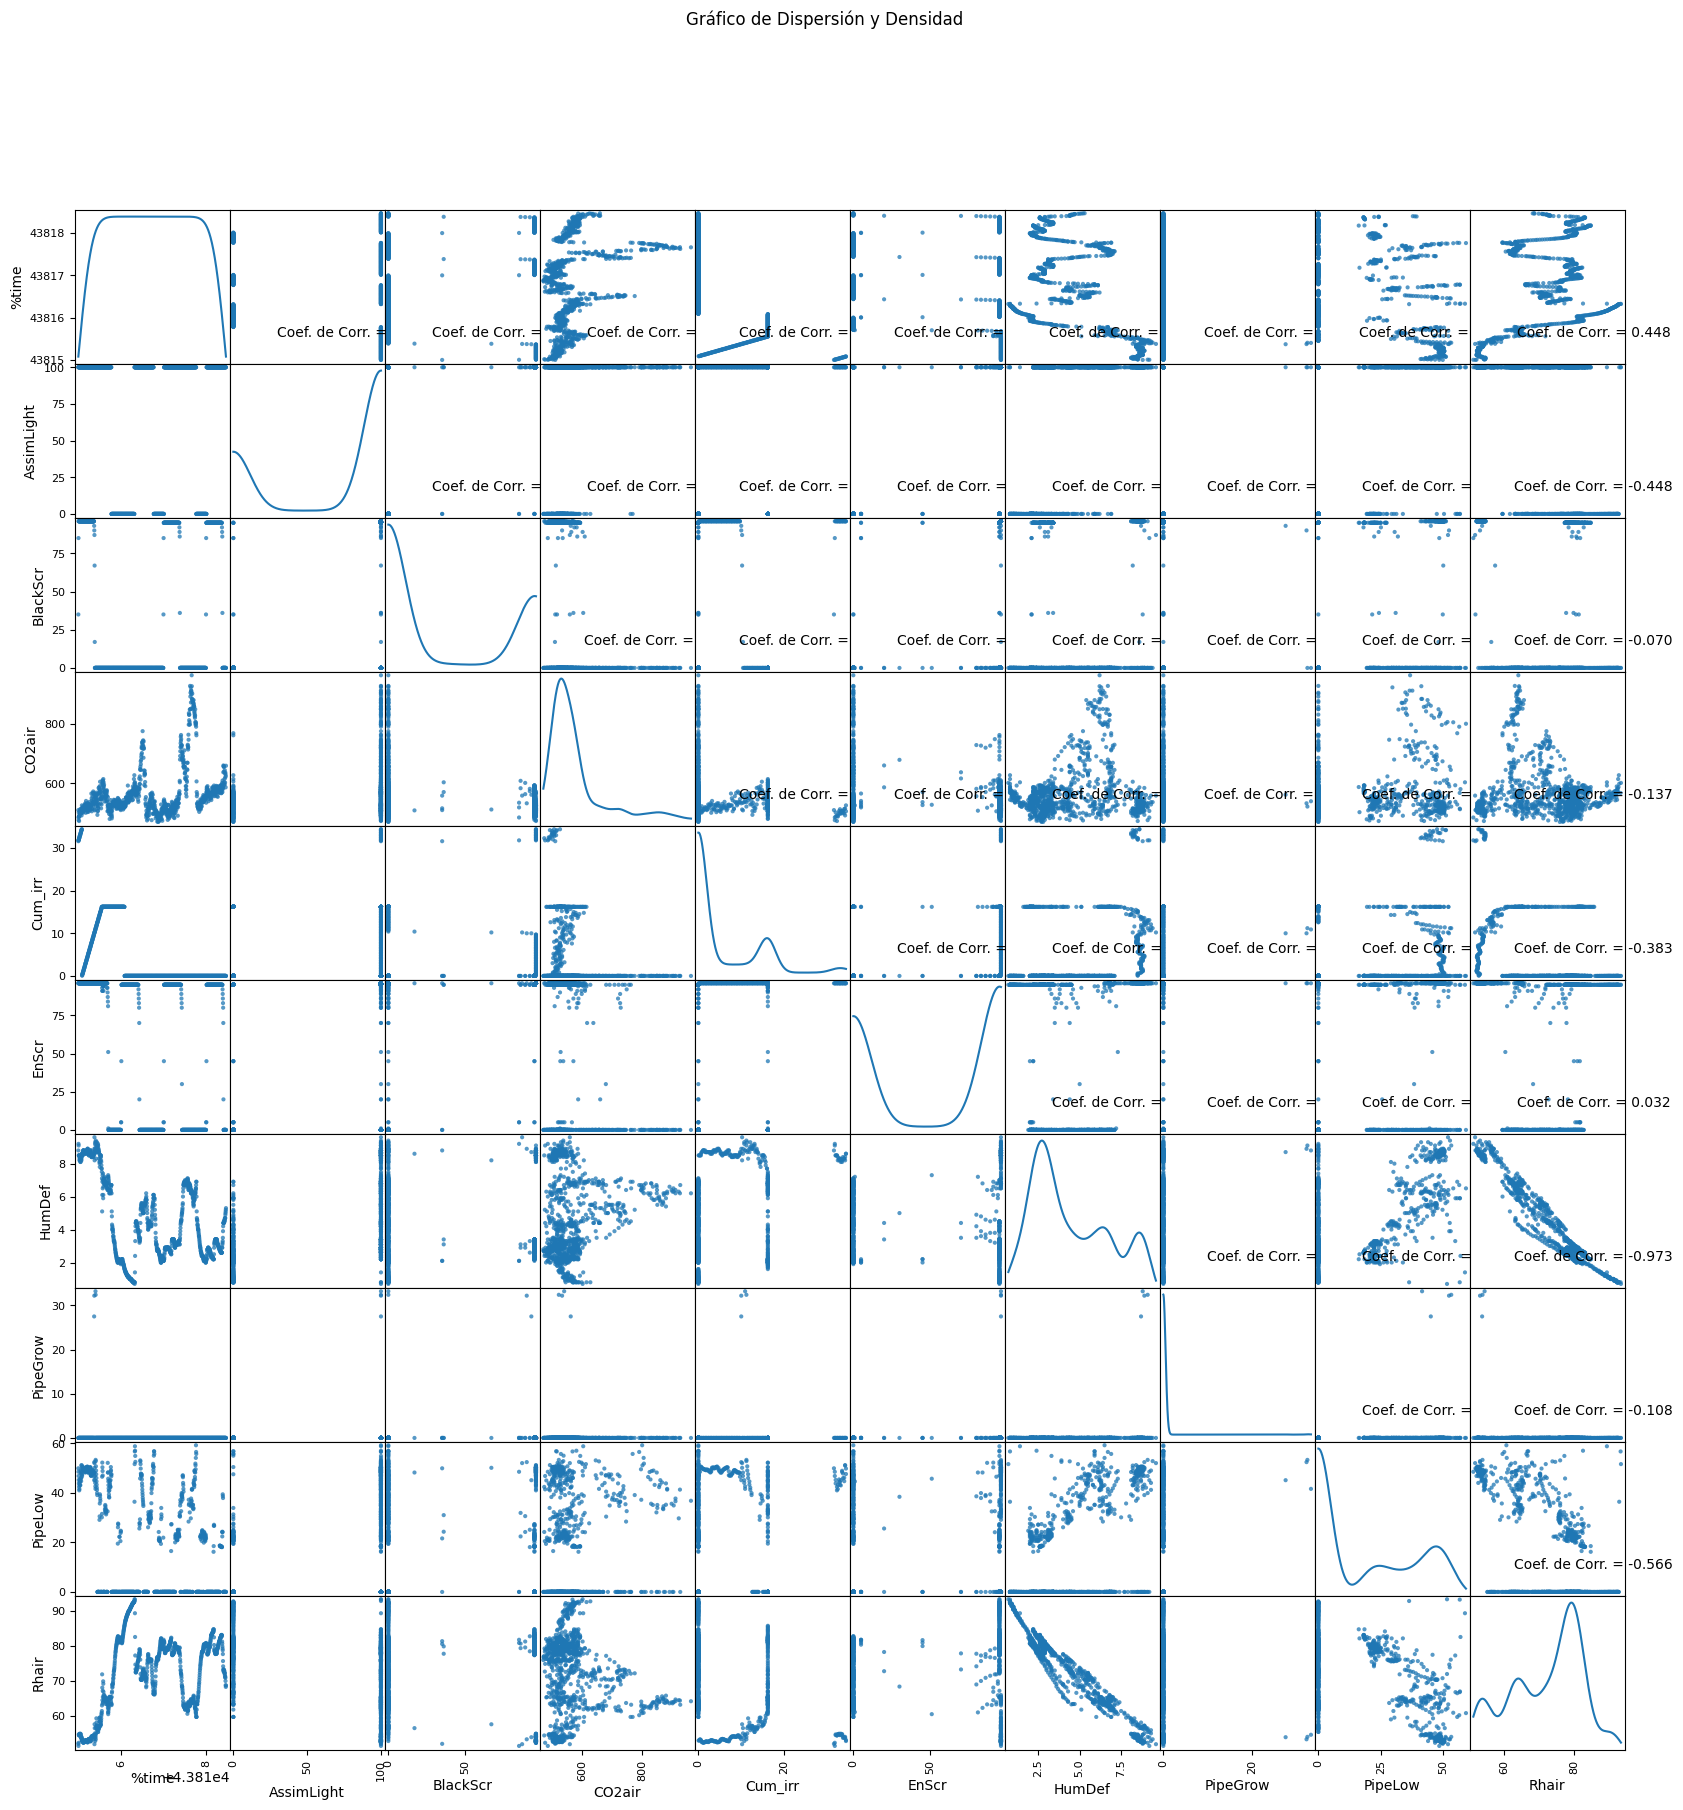

In [21]:
plotPerColumnDistribution(df1, 6, 1)
plotCorrelationMatrix(df1, 9)
plotScatterMatrix(df1, 20, 10)

# LabAnalysis.csv

In [16]:

df2 = pd.read_csv('kaggle/input/AICU/LabAnalysis.csv', delimiter=',', nrows=nRowsRead)
df2.dataframeName = 'LabAnalysis.csv'
print(f'There are {df2.shape[0]} rows and {df2.shape[1]} columns in {df2.dataframeName}')
print(df2.head())

There are 10 rows and 39 columns in LabAnalysis.csv
   %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
0  43836     5.3     4.3      1.1   15.2     0.3     9.6     4.9    0.09   
1  43850     5.2     4.0      1.1   11.3     0.3     9.8     4.1    0.09   
2  43864     4.8     3.9      1.3   11.6     0.3    10.2     3.5    0.09   
3  43879     4.8     3.7      1.4   13.3     0.4     8.2     2.8    0.09   
4  43893     4.7     3.5      1.1   11.3     0.4     7.6     2.5    0.01   

   irr_NO3  ...  drain_Cl  drain_SO4  drain_HCO3  drain_PO4  drain_Fe  \
0     21.7  ...       7.6       13.5         1.4       2.00      27.8   
1     21.0  ...      10.0       23.4         1.3       0.42      21.1   
2     18.6  ...      12.0       17.5         1.0       1.30      18.3   
3     16.0  ...      20.0       13.2         0.1       6.10      24.4   
4     14.1  ...      21.2       11.6         0.1       9.32      31.0   

   drain_Mn  drain_Zn  drain_B  drain_Cu  drain_Mo  

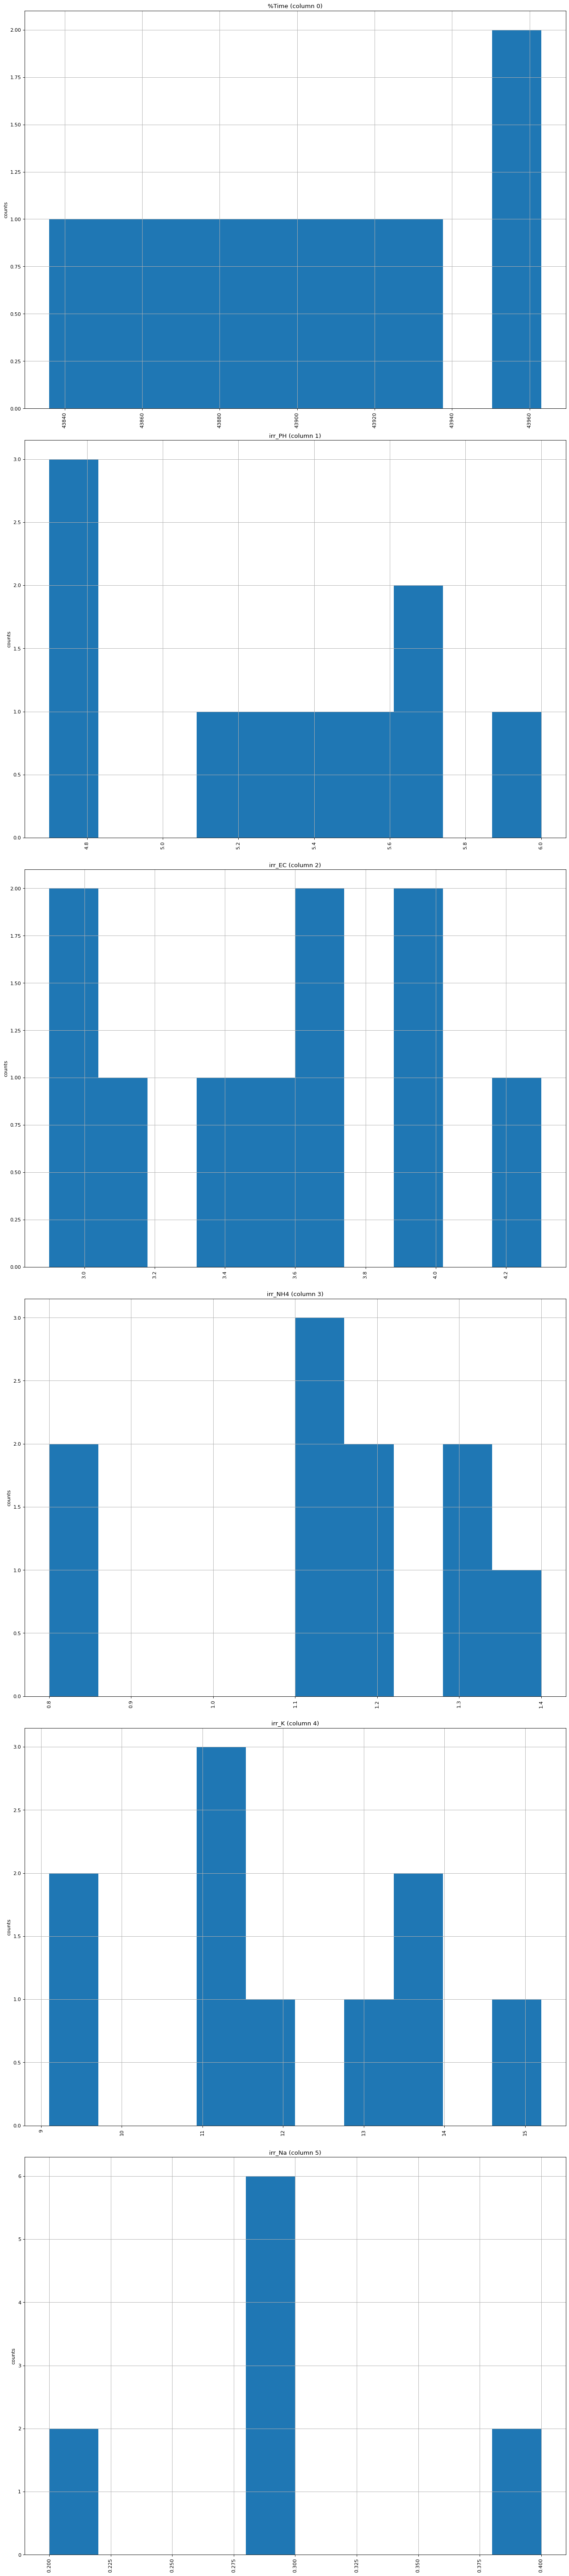

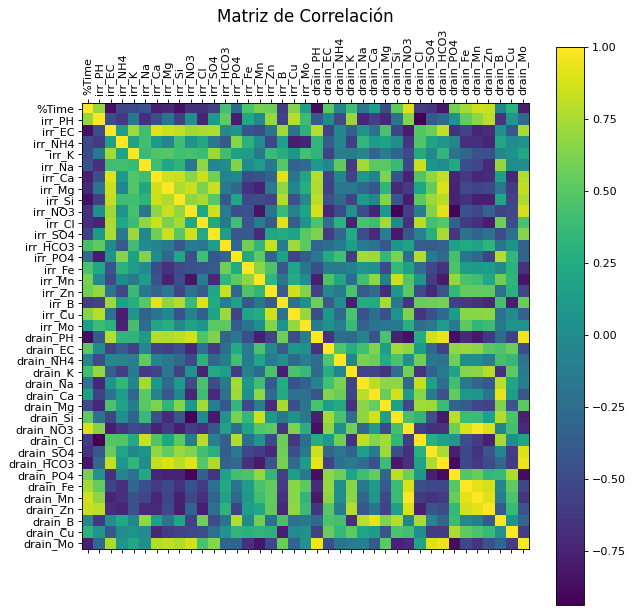

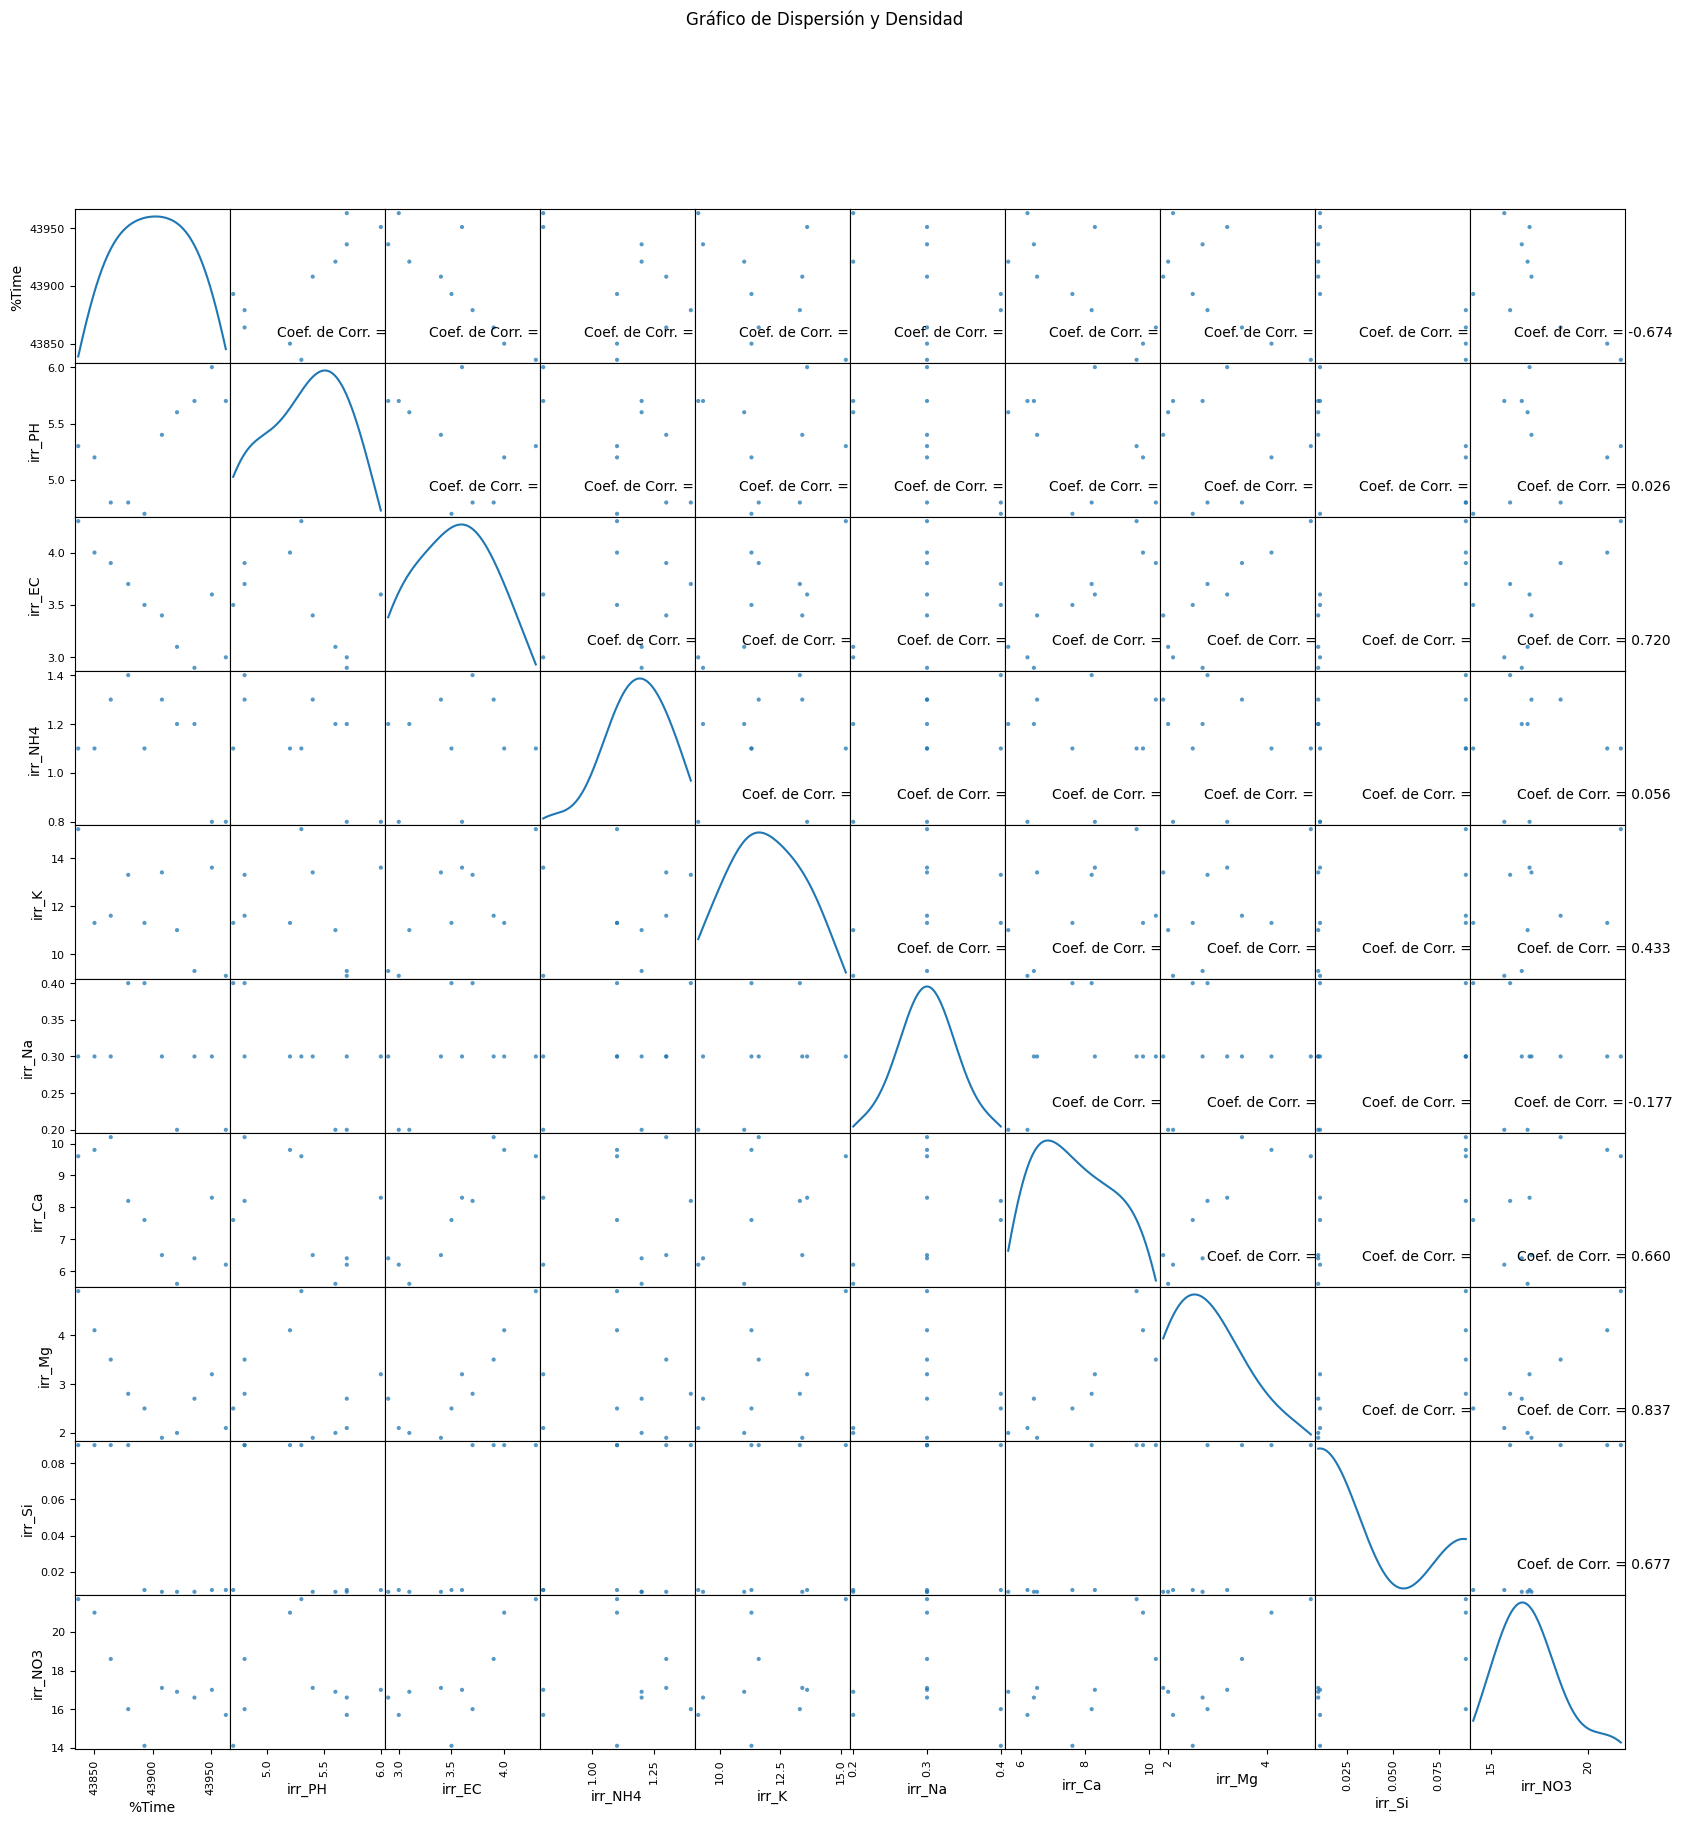

In [18]:
plotPerColumnDistribution(df2, 6, 1)
plotCorrelationMatrix(df2, 9)
plotScatterMatrix(df2, 20, 10)

# TomQuality.csv

In [19]:

df3 = pd.read_csv('kaggle/input/AICU/TomQuality.csv', delimiter=',', nrows=nRowsRead)
df3.dataframeName = 'TomQuality.csv'
print(f'There are {df3.shape[0]} rows and {df3.shape[1]} columns in {df3.dataframeName}')
print(df3.head())

There are 8 rows and 8 columns in TomQuality.csv
   %time  Flavour   TSS  Acid  %Juice  Bite  Weight DMC_fruit
0  43880        80  9.0  14.5      67   219     9.0       NaN
1  43894        74  8.3  13.6      60   277    10.1       NaN
2  43908        71  8.3  12.1      53   285    11.4      8.73
3  43922        76  8.9  13.3      58   334    10.0      9.07
4  43936        73  8.9  12.5      51   290    11.0      8.71


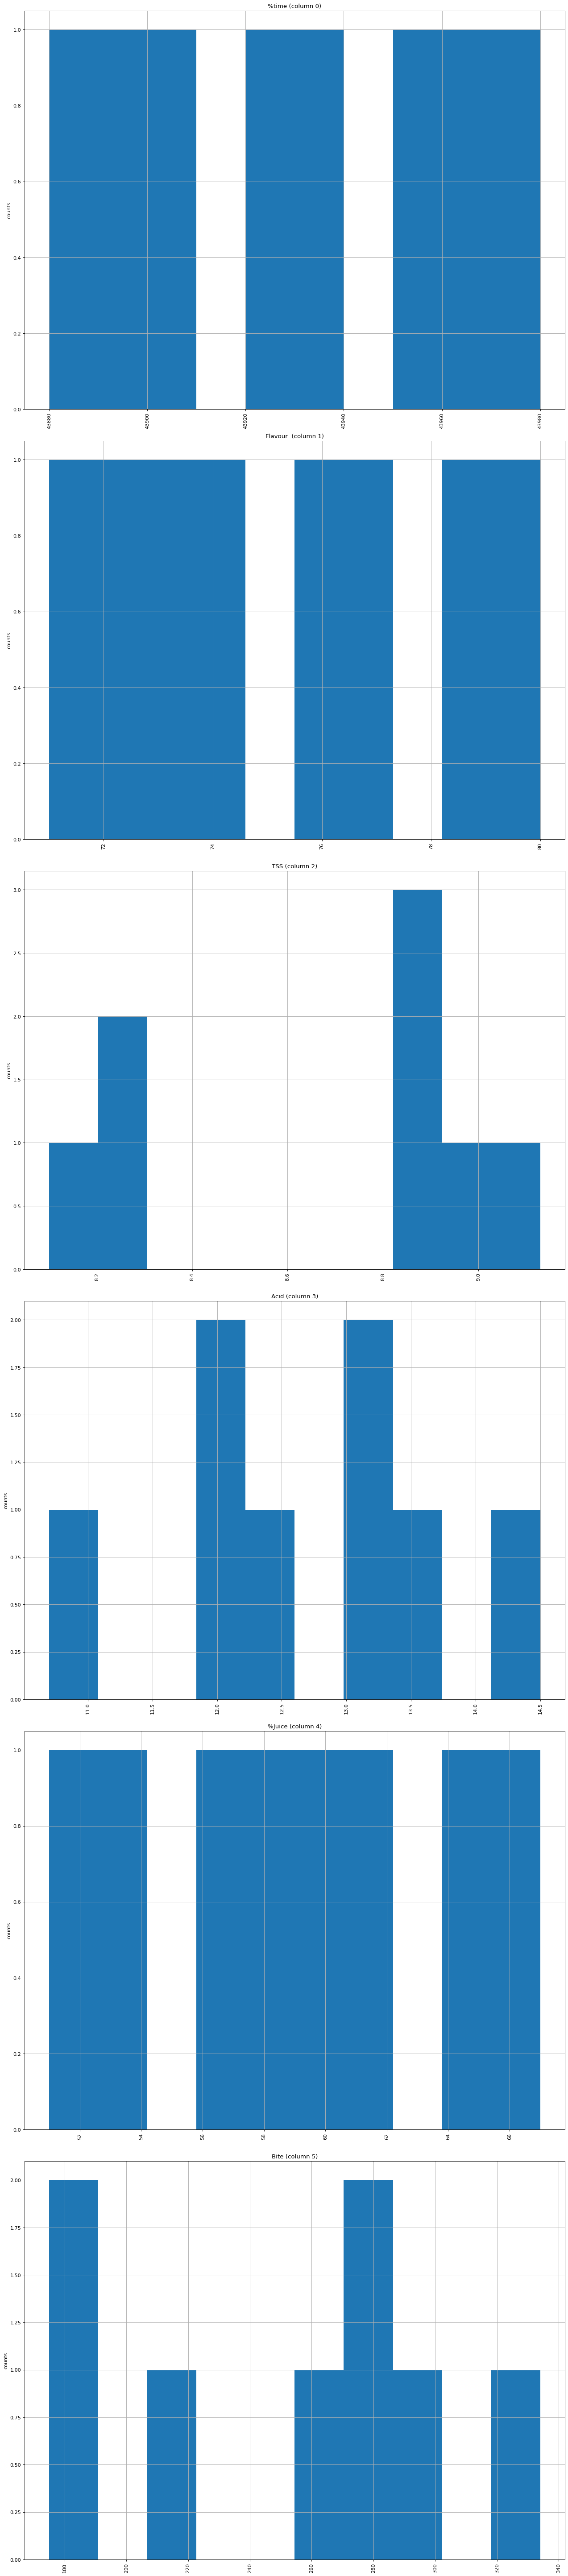

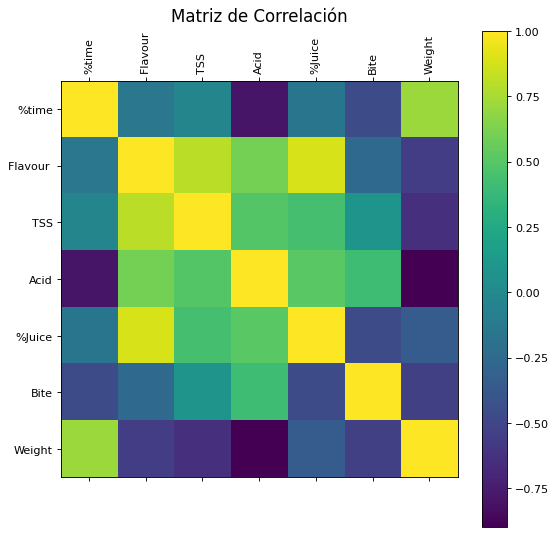

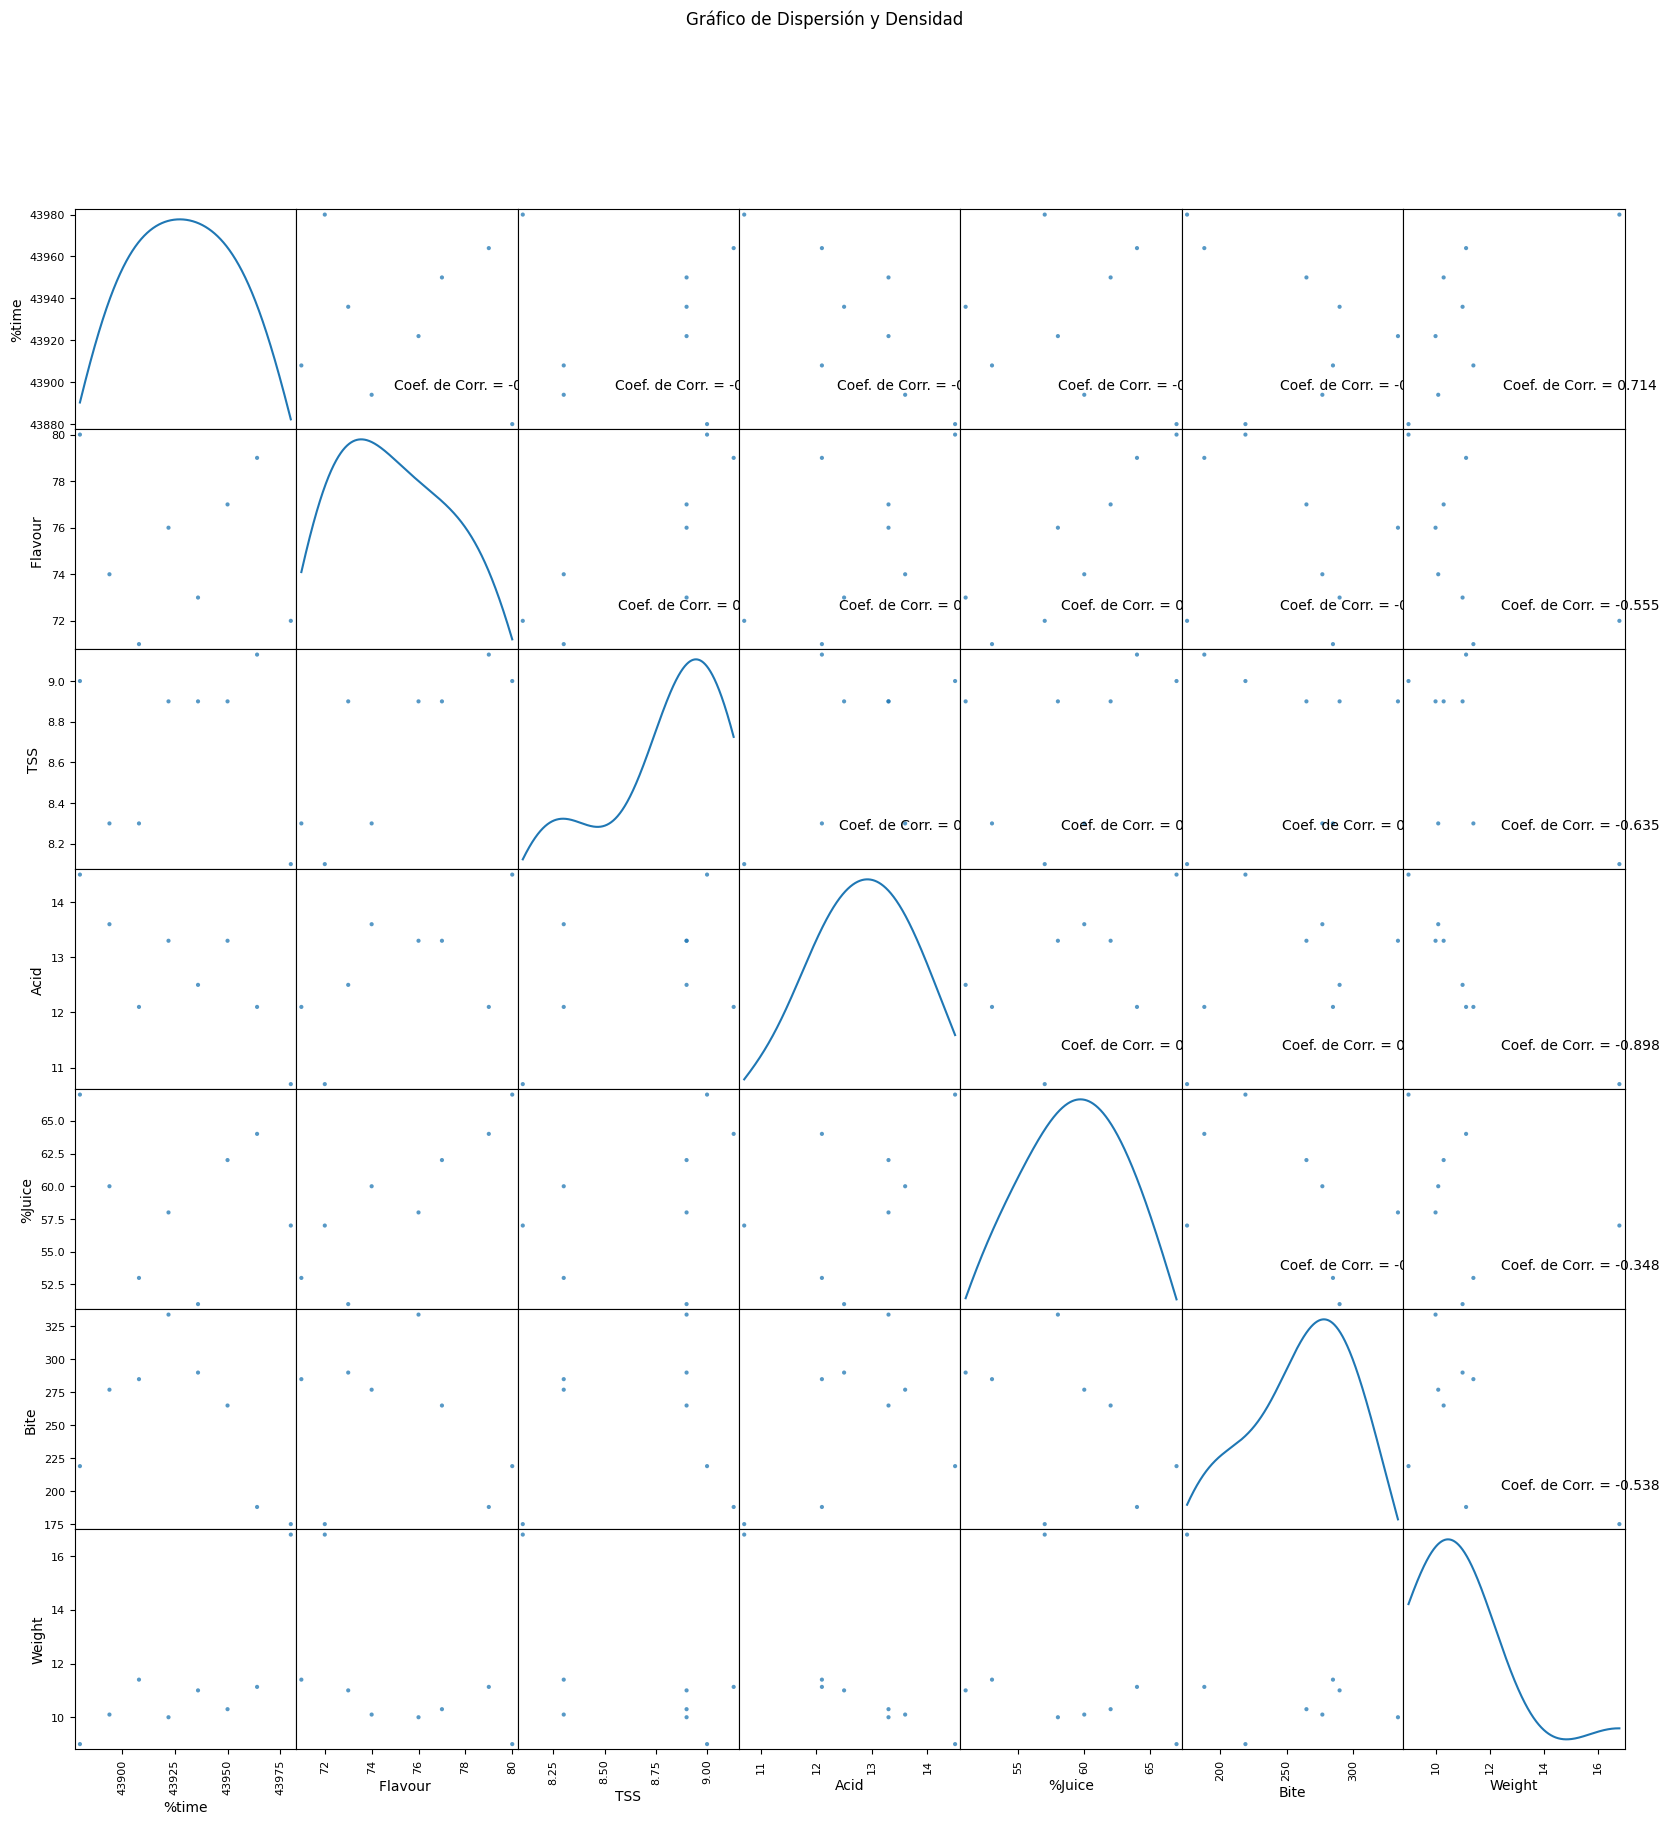

In [20]:
plotPerColumnDistribution(df3, 6, 1)
plotCorrelationMatrix(df3, 8)
plotScatterMatrix(df3, 20, 10)

# Análisis de series temporales

Realizaremos un análisis de series temporales y aplicaremos un modelo predictivo para una de las variables climáticas comunes a todos los equipos.

In [ ]:


# Función para cargar y combinar los datos de todos los equipos
def load_and_combine_data(base_dir):
    teams = ['TheAutomators', 'AICU', 'IUACAAS', 'Digilog', 'Automatoes', 'Reference']
    combined_df = pd.DataFrame()
    
    for team in teams:
        file_path = os.path.join(base_dir, team, 'GreenhouseClimate.csv')
        team_df = pd.read_csv(file_path, parse_dates=['%time'], index_col='%time')
        team_df['team'] = team  # Añadir columna para identificar el equipo
        combined_df = pd.concat([combined_df, team_df])
        
    return combined_df

# Ruta base donde se encuentran los datos
base_dir = 'kaggle/input'
df = load_and_combine_data(base_dir)

# Verificar la estructura de los datos
print(df.head())


Seleccionamos una variable, CO2air, y descomponemos la serie temporal en sus componentes. Además realizamos una limpieza de los datos recolectados como 0 o valores nulos

In [39]:
# Seleccionar una variable para el análisis
data = df['CO2air']

In [41]:
# Imputar valores faltantes usando interpolación
data = data.interpolate(method='linear')

C:\Users\TANIA CUSTUZA\AppData\Local\Temp\ipykernel_19644\2644275300.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear')


In [42]:

# Eliminar valores infinitos
data = data[~data.isin([np.inf, -np.inf])]

0


In [50]:
# Eliminar ceros
data = data.replace(0, np.nan).dropna()

In [54]:
# Verifica si hay duplicados en el índice de tiempo
print(data.index.duplicated().sum())

# Ordena los datos por el índice de tiempo
data = data.sort_index()


239045


In [55]:
# Verifica la longitud de los datos
print(len(data))


286854


In [ ]:
# Crear datos de ejemplo
np.random.seed(0)
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='H')

data = pd.Series(np.sin(np.linspace(0, 10, len(date_rng))) + np.random.normal(0, 0.1, len(date_rng)), index=date_rng)

In [57]:
# Realizar la descomposición
decomposition = seasonal_decompose(data, model='additive', period=24)

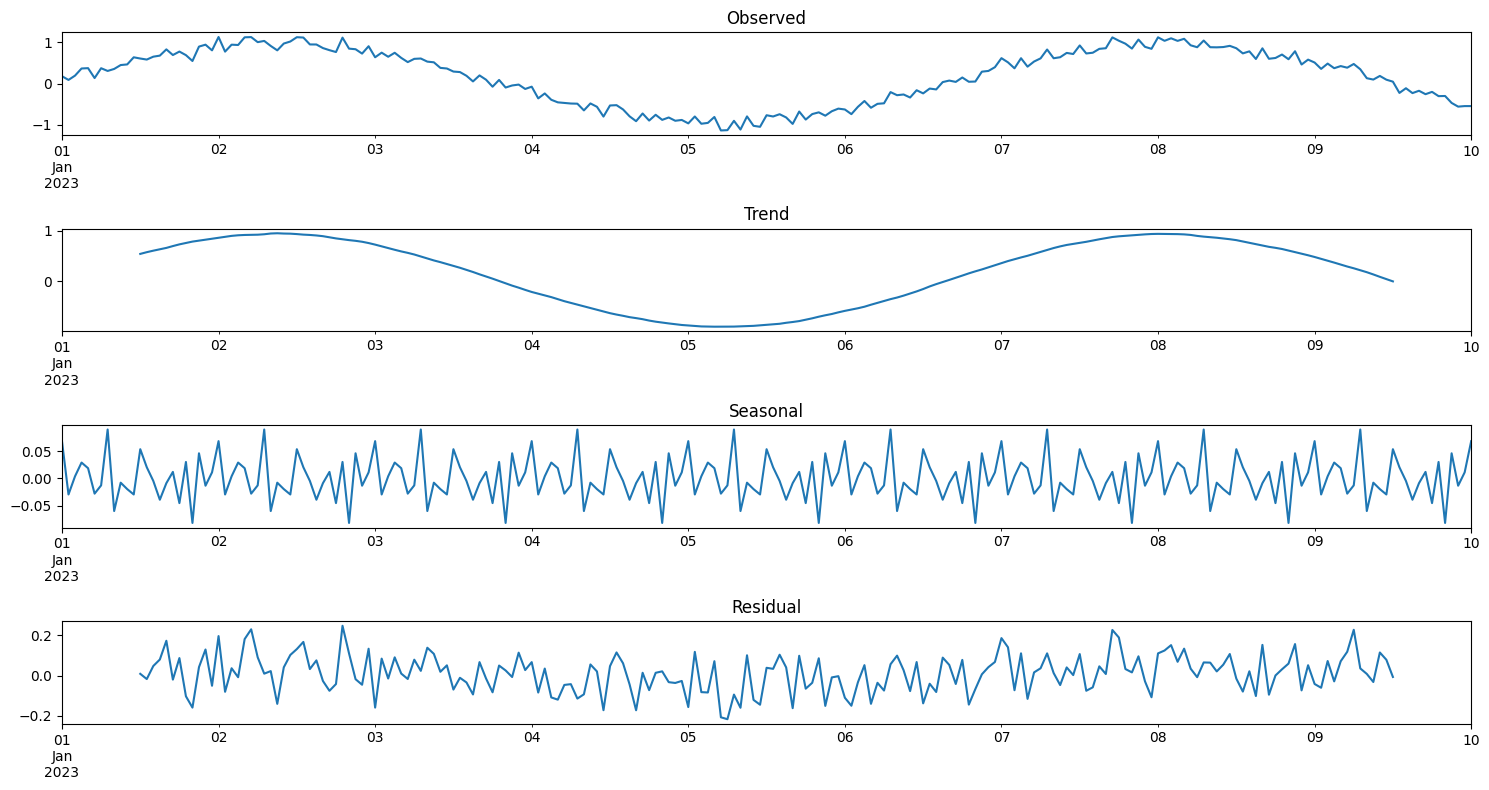

In [58]:
# Graficar la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
pt.show()

Ajustamos un modelo ARIMA para predecir las futuras observaciones de CO2air

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Dividir los datos en entrenamiento y prueba
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(5, 1, 0))  # Parámetros p, d, q pueden ajustarse según el ACF y PACF
arima_result = model.fit()

# Realizar predicciones
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = arima_result.predict(start=start, end=end, typ='levels')

# Graficar las predicciones junto con los datos reales
plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.show()


Evaluamos la precisión del modelo utilizando métricas como el  MAE (Mean Absolute Error) y RMSE (Root Mean Squared Error)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 0.7574604027923563
RMSE: 0.8925685219159982


En este proyecto, hemos llevado a cabo un análisis exhaustivo de un conjunto de datos de un invernadero automatizado, utilizando diversas técnicas para evaluar y mejorar las condiciones ambientales del sistema. El objetivo principal fue implementar un análisis de series temporales para comprender mejor las variables climáticas y su impacto en la producción.

1. Análisis Exploratorio de Datos (EDA)
Inicialmente, realizamos un análisis exploratorio para identificar patrones y relaciones entre diferentes variables climáticas. Esto incluyó:

Distribución de Columnas: Se generaron histogramas y gráficos de barras para cada columna, lo que ayudó a identificar la distribución de los datos y a detectar cualquier anomalía.

Matrices de Correlación: Se construyeron matrices de correlación para visualizar las relaciones entre variables. Esto permitió identificar variables que están altamente correlacionadas, lo que puede ser útil para la selección de características en futuros modelos.

Matrices de Dispersión: Se crearon gráficos de dispersión para examinar la relación entre pares de variables numéricas, proporcionando una visión detallada de cómo las variables interactúan entre sí.

2. Análisis de Series Temporales
Para profundizar en el análisis de las series temporales, llevamos a cabo los siguientes pasos:

Descomposición de Series Temporales: Intentamos descomponer los datos en componentes de tendencia, estacionalidad y residualidad. Sin embargo, encontramos problemas debido a la presencia de valores faltantes o a la estructura de los datos.

Modelo de Predicción: Utilizamos técnicas de modelado para evaluar la capacidad predictiva de las series temporales. La evaluación del modelo produjo los siguientes resultados:

MAE (Mean Absolute Error): 0.7575
RMSE (Root Mean Squared Error): 0.8926